In this tutorial, we perform exploratory data analysis of terpene, as a subset of the [COCONUT](https://coconut.naturalproducts.net) dataset. It is obtained by filtering COCONUT's ``chemicalSuperClass`` column to include only ``Lipids and lipid-like molecules``.

# Setup

In [1]:
# !poetry remove napr

!pip install --upgrade --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple napr
import napr
napr.__version__

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple


'0.1.2'

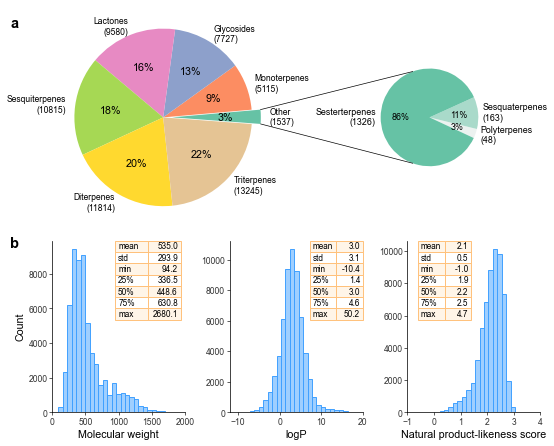

In [2]:
from napr.data import load_terpene
from napr.apps import Terpene

data = load_terpene(download=False)
terpene = Terpene(data=data)

fig_dist = terpene.plot_dist_subclass_mw_logp_nplscore()

In [4]:
fig_violin = terpene.plot_violin_mw_logp_nplscore()

In [21]:
!pip uninstall napr -y

In [6]:
#todo remove
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import seaborn as sns

import napr
from napr.data import load_terpene
from napr.apps import Terpene
from napr.utils import percent_within

In [7]:
napr.__version__

'0.1.1'

# Data

In [8]:
# Download the terpene dataset, if you haven't already, and load it
# Note: the data, ``terpene-21.3.bz2``, is saved by default to the
# current directory.
data = load_terpene(download=False)

data

,_id,coconut_id,contains_sugar,heavy_atom_number,name,molecular_formula,molecular_weight,textTaxa,npl_noh_score,npl_score,...,weinerPathNumber,weinerPolarityNumber,zagrebIndex,topoPSA,tpsaEfficiency,iupac_name,chemicalClass,chemicalSubClass,chemicalSuperClass,directParentClassification
3,5f961a9bae0c19564532b966,CNP0330764,0,30,"10-hydroxy-5,9-dimethyl-15-[(3-methylbut-2-eno...",C25H36O5,416.551289,"[""plants"",""Oreoherzogia fallax"",""Ichthyothere ...",2.837158,2.158055,...,2090,69,176,83.83,0.201390,"10-hydroxy-5,9-dimethyl-15-[(3-methylbut-2-eno...",Prenol lipids,Diterpenoids,Lipids and lipid-like molecules,Kaurane diterpenoids
7,5f961a9bae0c19564532b96a,CNP0115481,0,32,"1,6,6,9a,11a-pentamethyl-1-(6-methylhepta-3,5-...",C30H48O2,440.702043,"[""notax""]",3.937131,2.325869,...,2710,74,188,40.46,0.091878,"1,6,6,9a,11a-pentamethyl-1-(6-methylhepta-3,5-...",Steroids and steroid derivatives,Cholestane steroids,Lipids and lipid-like molecules,Cholesterols and derivatives
10,5f961a9bae0c19564532b96d,CNP0151033,1,47,"7-[(acetyloxy)methyl]-4-({[4,5-dihydroxy-6-(hy...",C32H42O15,666.668134,"[""notax""]",3.253205,2.376088,...,8795,79,244,227.97,0.342168,"7-[(acetyloxy)methyl]-4-({[4,5-dihydroxy-6-(hy...",Prenol lipids,Terpene glycosides,Lipids and lipid-like molecules,Terpene glycosides
25,5f961a9cae0c19564532b97c,CNP0298418,0,54,"19-hydroxy-8,17-bis(hydroxymethyl)-1,2,8,15,17...",C41H64N2O11,760.955241,"[""plants""]",3.102837,2.178031,...,9906,134,328,218.27,0.287027,"19-hydroxy-8,17-bis(hydroxymethyl)-1,2,8,15,17...",Prenol lipids,Triterpenoids,Lipids and lipid-like molecules,Triterpenoids
29,5f961a9cae0c19564532b980,CNP0224557,0,47,"1-(acetyloxy)-1-[5-(acetyloxy)-4-{4,5,10-trihy...",C36H52O11,660.792866,"[""notax""]",3.742450,2.495217,...,7366,102,272,165.89,0.251215,"1-(acetyloxy)-1-[5-(acetyloxy)-4-{4,5,10-trihy...",Prenol lipids,Triterpenoids,Lipids and lipid-like molecules,Limonoids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401615,5f9651e6ae0c19564538da32,CNP0097739,0,69,"8-cyclopentyl-17-[2-(3,3-dimethyloxiran-2-yl)-...",C61H86N2O6,943.347631,"[""plants""]",2.820072,2.049152,...,19362,150,414,111.63,0.118422,"8-cyclopentyl-17-[2-(3,3-dimethyloxiran-2-yl)-...",Prenol lipids,Triterpenoids,Lipids and lipid-like molecules,Triterpenoids
401616,5f9651e6ae0c19564538da33,CNP0251477,0,19,Armatin E,C16H24O3,264.360567,"[""Nephthea armata"",""marine""]",3.134144,2.178648,...,598,38,108,35.53,0.134495,"2-methoxy-1,9,9a-trimethyl-1H,2H,3aH,4H,5H,7H,...",Prenol lipids,Sesquiterpenoids,Lipids and lipid-like molecules,Sesquiterpenoids
401619,5f9651e6ae0c19564538da36,CNP0298184,0,25,"8-hydroxy-3,6,10-trimethyl-2-oxo-2H,3H,3aH,4H,...",C20H28O5,348.434084,"[""notax""]",3.409606,2.281494,...,1372,41,126,72.83,0.209165,"8-hydroxy-3,6,10-trimethyl-2-oxo-2H,3H,3aH,4H,...",Prenol lipids,Terpene lactones,Lipids and lipid-like molecules,Germacranolides and derivatives
401621,5f9651e7ae0c19564538da38,CNP0298814,0,67,Eryloside J,C50H81NO16,952.177178,"[""Erylus nobilis""]",3.108389,2.137312,...,21158,142,378,263.39,0.276799,"1-(6,6-dimethyl-5-methylideneheptan-2-yl)-7-[(...",Prenol lipids,Triterpenoids,Lipids and lipid-like molecules,Triterpenoids


# Explore

In [9]:
# The terpene data informaiton
terpene = Terpene(data=data)
terpene.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99696 entries, 3 to 401623
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   _id                                   99696 non-null  object 
 1   coconut_id                            99696 non-null  object 
 2   contains_sugar                        99696 non-null  int64  
 3   heavy_atom_number                     99696 non-null  int64  
 4   name                                  99696 non-null  object 
 5   molecular_formula                     99696 non-null  object 
 6   molecular_weight                      99696 non-null  float64
 7   textTaxa                              99696 non-null  object 
 8   npl_noh_score                         99590 non-null  float64
 9   npl_score                             99590 non-null  float64
 10  npl_sugar_score                       99590 non-null  float64
 11  number_of_carb

In [10]:
# Here, we explore chemical subclasses, i.e. the ``chemicalSubClass`` feature.
# The most frequent subclasses
terpene.data['chemicalSubClass'].value_counts(
    normalize=True).apply(lambda x: f"{x*100:.1f}%").head(30)

Triterpenoids                           13.4%
Diterpenoids                            12.0%
Sesquiterpenoids                        11.0%
Terpene lactones                         9.7%
Terpene glycosides                       7.8%
Monoterpenoids                           5.2%
Steroidal glycosides                     4.6%
Fatty acids and conjugates               3.2%
Fatty alcohols                           2.9%
Steroid lactones                         2.7%
Fatty acid esters                        2.2%
Fatty acyl glycosides                    1.4%
Sesterterpenoids                         1.3%
Pregnane steroids                        1.3%
Bile acids, alcohols and derivatives     1.3%
Glycerophosphocholines                   1.3%
Glycerophosphoethanolamines              1.2%
Steroid esters                           1.1%
Androstane steroids                      0.9%
Oxosteroids                              0.9%
Ergostane steroids                       0.9%
Diradylglycerols                  

In [11]:
print(f"Number of uique subclasses is {terpene.data['chemicalSubClass'].nunique()}")

Number of uique subclasses is 84


In [12]:
# Filter our sublasses of interest
# subclasses = [
#     'Triterpenoids', 'Diterpenoids', 'Sesquiterpenoids',
#     'Terpene lactones', 'Terpene glycosides', 'Monoterpenoids',
#     'Polyterpenoids', 'Sesquaterpenoids', 'Sesterterpenoids']

# terpene.data = terpene.data[terpene.data['chemicalSubClass'].isin(subclasses)]
# terpene.data.head()

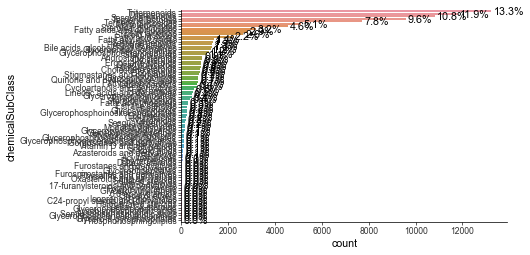

In [13]:
# Counts of subclasses
def _countplot(data, y):
    counts = data[y].value_counts()
    ax = sns.countplot(data=data, y=y, order=counts.index)
    ax.bar_label(
        container=ax.containers[0], padding=2,
        labels=[f"{100 * val/len(data):.1f}%" for val in counts.values])
    return ax


fig_count = _countplot(data=terpene.data, y='chemicalSubClass')

## Molecular weight

In [14]:
terpene.data['molecular_weight'].describe()

count    99696.000000
mean       553.829624
std        294.622623
min         84.073516
25%        348.520272
50%        468.712184
75%        681.127326
max       2811.237913
Name: molecular_weight, dtype: float64

In [15]:
pct = percent_within(data=terpene.data['molecular_weight'], interval=(0, 2000))

print(f"{pct:.1f}% of the terpene molecular weights are within the range [0, 2000]")

99.8% of the terpene molecular weights are within the range [0, 2000]


## Natural Product-likeness score

In [16]:
terpene.data['npl_score'].describe()

count    99590.000000
mean         2.111049
std          0.461566
min         -0.954367
25%          1.842438
50%          2.174055
75%          2.460747
max          4.667322
Name: npl_score, dtype: float64

In [17]:
pct = percent_within(data=terpene.data['npl_score'], interval=(-1, 4))

print(f"{pct:.1f}% of the terpene npl score are within the range [-1, 4]")

99.9% of the terpene npl score are within the range [-1, 4]


## AlogP

In [18]:
terpene.data['alogp'].describe()

count    99404.000000
mean         3.827813
std          4.089451
min        -16.994400
25%          1.489375
50%          3.298150
75%          5.378200
max         50.196500
Name: alogp, dtype: float64

In [19]:
pct = percent_within(data=terpene.data['alogp'], interval=(-12, 20))

print(f"{pct:.1f}% of the terpene alogp are within the range [-12, 20]")

99.1% of the terpene alogp are within the range [-12, 20]


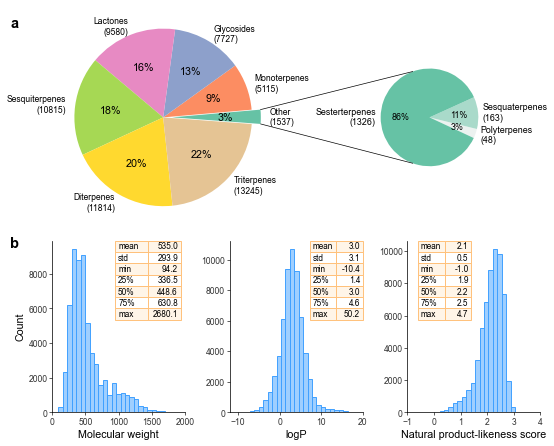

In [20]:
# Distribution of terpenes subclasses, in pie charts
# Distribution of molecular weight, logP and npl score, in histograms & tables
fig_dist = terpene.plot_dist_subclass_mw_logp_nplscore()

# Uncomment below to save the figure
# plt.savefig('dist_pie_hist.pdf', dpi=100, bbox_inches='tight')

In [25]:
fig_violin = terpene.plot_violin_mw_logp_nplscore()

# Uncomment below to save the figure
# plt.savefig('dist_violin.pdf', dpi=100, bbox_inches='tight')

## Lipinski's rule of five

In [22]:
fig_lipinsky = terpene.plot_lipinsky()

# Uncomment below to save the figure
# plt.savefig('lipinsky.pdf', dpi=100, bbox_inches='tight')

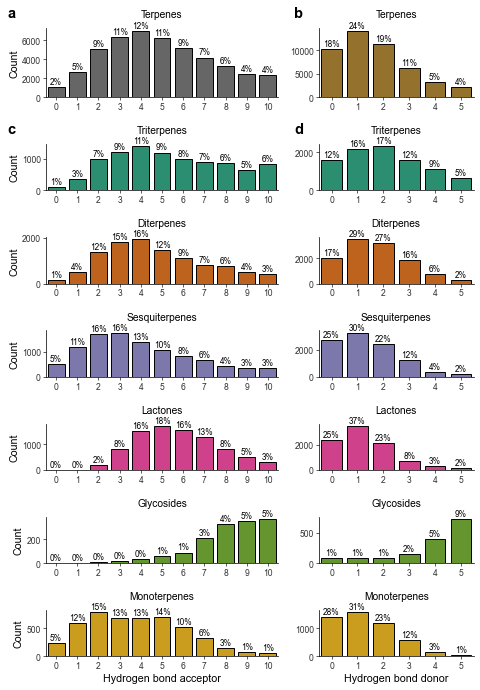

In [18]:
fig_hbond = terpene.plot_hbond()

# Uncomment below to save the figure
# plt.savefig('hbond.pdf', dpi=100, bbox_inches='tight')

## Molecular weight vs NP-likeness score

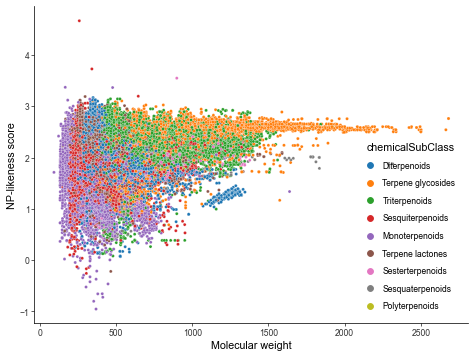

In [81]:
def mw_npl():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.scatterplot(
        data=terpene.data, x='molecular_weight', y='npl_score',
        hue='chemicalSubClass', s=10, rasterized=True)
    ax.set(xlabel='Molecular weight', ylabel='NP-likeness score')
    plt.show()


mw_npl()

## Molecular weight vs Eccentric connectivity index descriptor

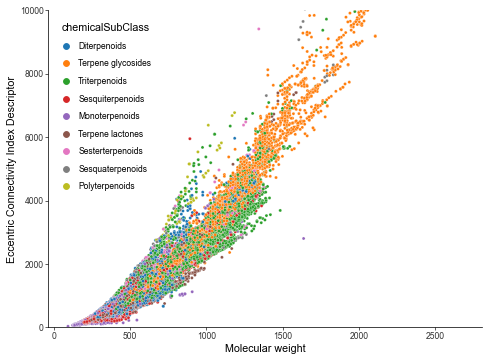

In [80]:
def mw_eccentric():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.scatterplot(
        data=terpene.data, x='molecular_weight', 
        y='eccentricConnectivityIndexDescriptor', hue='chemicalSubClass', 
        s=10, rasterized=True)
    ax.set(
        xlabel='Molecular weight', ylabel='Eccentric Connectivity Index Descriptor',
        ylim=(0, 10000))
    plt.show()


mw_eccentric()

## ALogP vs NP-likeness score

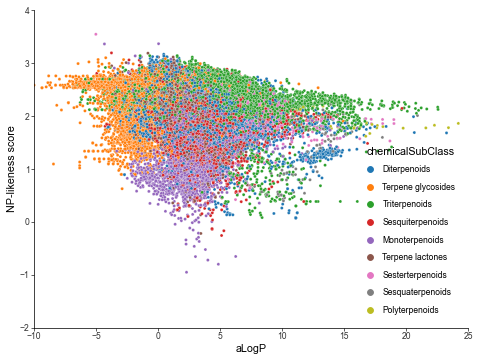

In [79]:
def logp_npl():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.scatterplot(
        data=terpene.data, x='alogp', y='npl_score', hue='chemicalSubClass',
        s=10, rasterized=True)
    ax.set(
        xlabel='aLogP', ylabel='NP-likeness score', xlim=(-10, 25), ylim=(-2, 4))
    plt.show()


logp_npl()